# Import libraries 

In [2]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 762.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 944.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [7]:
titanic = pd.read_csv("Titanic.csv")
print(titanic.shape)
titanic.head()


(2201, 4)


,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [10]:
df=pd.get_dummies(titanic)
# df[df]
df.head()


,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,False,False,True,False,False,True,False,True,True,False
1,False,False,True,False,False,True,False,True,True,False
2,False,False,True,False,False,True,False,True,True,False
3,False,False,True,False,False,True,False,True,True,False
4,False,False,True,False,False,True,False,True,True,False


# Apriori Algorithm 

In [12]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.320763,(Class_3rd)
1,0.402090,(Class_Crew)
2,0.786461,(Gender_Male)
3,0.950477,(Age_Adult)
4,0.676965,(Survived_No)
5,0.323035,(Survived_Yes)
6,0.391640,"(Gender_Male, Class_Crew)"
7,0.402090,"(Age_Adult, Class_Crew)"
8,0.305770,"(Survived_No, Class_Crew)"
9,0.757383,"(Age_Adult, Gender_Male)"


In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004,0.901730
1,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
2,(Age_Adult),(Class_Crew),0.950477,0.402090,0.402090,0.423040,1.052103,0.019913,1.036311,1.000000
3,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf,0.082827
4,(Survived_No),(Class_Crew),0.676965,0.402090,0.305770,0.451678,1.123325,0.033569,1.090436,0.339858
5,(Class_Crew),(Survived_No),0.402090,0.676965,0.305770,0.760452,1.123325,0.033569,1.348519,0.183616
6,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116,0.263149
7,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441,0.061028
8,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634,0.659783
9,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [14]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
45,"(Survived_No, Class_Crew)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079,0.344592
40,"(Gender_Male, Age_Adult)","(Survived_No, Class_Crew)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764,0.986022
17,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480,0.371976
12,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157,0.916706
47,(Gender_Male),"(Age_Adult, Class_Crew, Survived_No)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622,0.983509
38,"(Age_Adult, Class_Crew, Survived_No)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983,0.302519
21,(Gender_Male),"(Survived_No, Class_Crew)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622,0.983509
20,"(Survived_No, Class_Crew)",(Gender_Male),0.305770,0.786461,0.304407,0.995542,1.265851,0.063931,47.903983,0.302519
49,(Class_Crew),"(Gender_Male, Age_Adult, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802,0.338549
36,"(Gender_Male, Age_Adult, Survived_No)",(Class_Crew),0.603816,0.402090,0.304407,0.504138,1.253795,0.061619,1.205800,0.510929


In [15]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004,0.901730
1,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621,0.322047
2,(Age_Adult),(Class_Crew),0.950477,0.402090,0.402090,0.423040,1.052103,0.019913,1.036311,1.000000
3,(Class_Crew),(Age_Adult),0.402090,0.950477,0.402090,1.000000,1.052103,0.019913,inf,0.082827
4,(Survived_No),(Class_Crew),0.676965,0.402090,0.305770,0.451678,1.123325,0.033569,1.090436,0.339858
5,(Class_Crew),(Survived_No),0.402090,0.676965,0.305770,0.760452,1.123325,0.033569,1.348519,0.183616
6,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116,0.263149
7,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441,0.061028
8,(Gender_Male),(Survived_No),0.786461,0.676965,0.619718,0.787984,1.163995,0.087312,1.523634,0.659783
9,(Survived_No),(Gender_Male),0.676965,0.786461,0.619718,0.915436,1.163995,0.087312,2.525187,0.436144


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

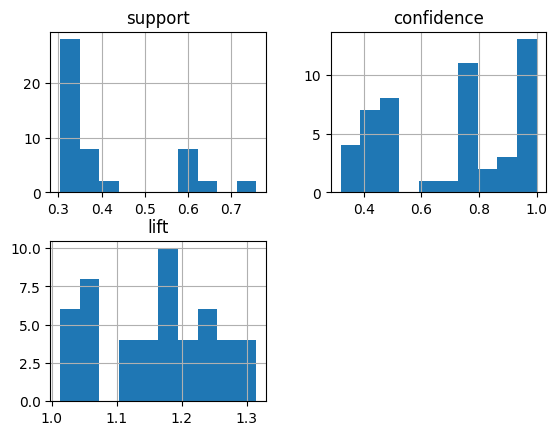

In [17]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist()


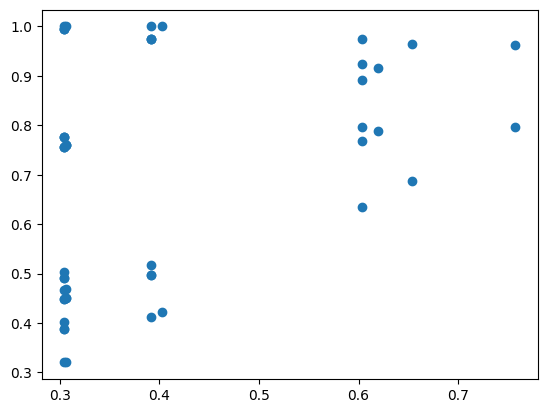

In [18]:
plt.scatter(rules['support'],rules['confidence'])